The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[array([-5, -5]), array([-0.5, -3.5]), array([-0.8,  0.7]), array([-0.5789427 ,  0.89649538]), array([-0.82456192,  0.01570937]), array([-0.49608878,  0.18152549]), array([-0.6971848 ,  0.03550928]), array([-0.47345729,  0.15029622]), array([-0.63810078,  0.05131504]), array([-0.47298768,  0.13733019]), array([-0.60778637,  0.06328247]), array([-0.4806152 ,  0.13036011]), array([-0.59097904,  0.07281194]), array([-0.49075852,  0.12621178]), array([-0.58111678,  0.08059467]), array([-0.50109812,  0.12358516]), array([-0.57507721,  0.08701429]), array([-0.51068392,  0.12184612]), array([-0.57125288,  0.09232575]), array([-0.5191748 ,  0.12065399]), array([-0.56876447,  0.09672122]), array([-0.52650707,  0.11981339]), array([-0.56710765,  0.10035542]), array([-0.53274117,  0.11920661]), array([-0.56598212,  0.10335645]), array([-0.53798816,  0.11875987]), array([-0.56520355,  0.10583149]), array([-0.54

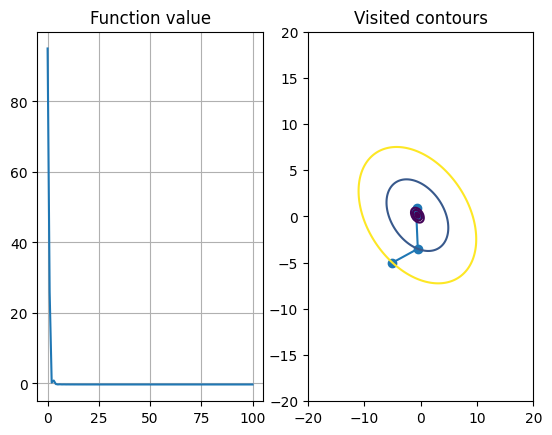

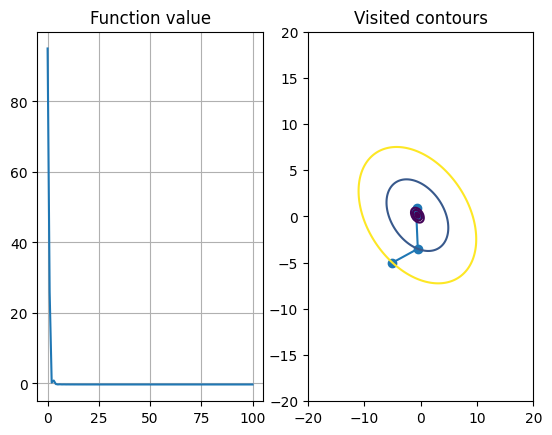

In [30]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

roi = SearchRegion2d((-20, 20), (-20, 20))


def get_func(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return a * x ** 2 + b * y ** 2 + c * x * y + d * x + e * y

    return func


def get_derivative(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return np.array([2 * a * x + c * y + d, 2 * b * y + c * x + e])

    return func


f1 = get_func(1, 0, 1, 0, 0)
g1 = get_derivative(1, 0, 1, 0, 0)
f2 = get_func(0, 2, 0, 1, 0)
g2 = get_derivative(0, 2, 0, 1, 0)


def sum_funcs(f, g):
    return lambda x: f(x) + g(x)


#points = steepest_descent(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), bin_search, lambda f, steps: len(steps) > 50)
points = gradient_descent_minibatch([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.3, 0.2, 1, 2), lambda f, steps: len(steps) > 100)
#points = steepest_descent_with_momentum(0.5)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_with_momentum(0.5, True)([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.4, 0.1), lambda f, steps: len(steps) > 100)
#points = steepest_descent_adagrad(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), fixed_step_search(1), lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_adagrad([f1, f2], [g1, g2], 1, np.array([-1, 1]), exponential_learning_scheduler(1, 0), lambda f, steps: len(steps) > 100)
#points = steepest_descent_rms_prop(0.5)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_rms_prop(0.2)([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.4, 0.1), lambda f, steps: len(steps) > 100)

print(points)
visualize_optimizing_process(sum_funcs(f1, f2), roi, np.array(points))

